In [14]:
import numpy as np
from scipy.stats import expon, zscore, norm
from math import log10
import matplotlib.pyplot as plt
%matplotlib inline

* 지수분포 참고: https://hsm-edu.tistory.com/1038?category=773067
* 코드 출처:  https://datascienceschool.net/02%20mathematics/08.04%20%EC%A0%95%EA%B7%9C%EB%B6%84%ED%8F%AC%EC%99%80%20%EC%A4%91%EC%8B%AC%EA%B7%B9%ED%95%9C%EC%A0%95%EB%A6%AC.html

### 중심극한정리
표본의 크기가 커질수록 표본 평균의 분포는 모집단의 분포 모양과는 관계없이 정규 분포에 가까워진다. 이때 표본 평균의 평균은 모집단의 모 평균과 같고, 표본 평균의 표준 편차는 모집단의 모 표준 편차를 표본 크기의 제곱근으로 나눈 것과 같다.


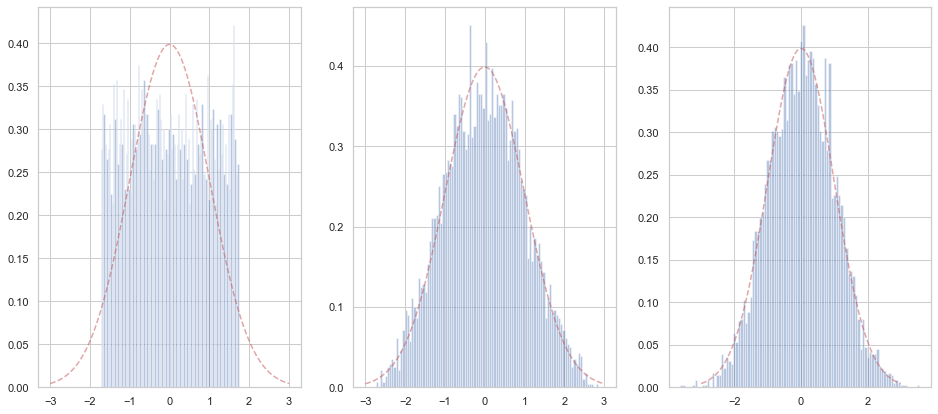

In [100]:
np.random.seed(0)
xx = np.linspace(-2, 2, 100)

f, ax = plt.subplots(1,3, figsize=(16, 7))
ax = ax.flatten()
x = np.linspace(-3, 3, 101)

for i, N in enumerate([1, 3, 20]):
    X = np.random.rand(5000, N) # N 개의 표본을 5000번 생성 (연속 균등 분포에서 추출)
    Xbar = (X.mean(axis=1) - 0.5) * np.sqrt(12 * N) # N개에 대한 표본 평균을 5000개 생성 (표준화)
    sns.distplot(Xbar, bins=100, kde=False, norm_hist=True, ax=ax[i])
    ax[i].plot(x, norm(0, 1).pdf(x), 'r--', alpha=.5)

* 0~1까지 uniform distribution은 기대값이 0, 분산이 12이다.
* 해당 분포에서 N개의 표본을 5000개 추출한 후, 해당 N개의 표본에 대한 평균을 구한후 5000개에 대한 histogram을 그렸다.
* 중심극한정리에서처럼 표본의 크기가 커질 수록 표본 평균의 분포는 정규분포에 근사하는 것을 볼 수 있다.
* 여기서 N개의 표본을 5000개 추출했는데, 이것을 300개 표본 평균을 N번 추출한 다음에 histogram을 그려도 동일한 결과가 나온다.

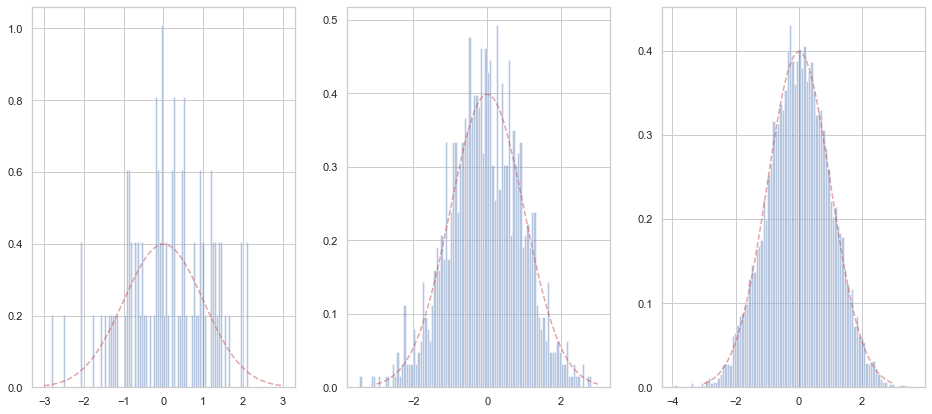

In [106]:
np.random.seed(0)
xx = np.linspace(-2, 2, 100)

f, ax = plt.subplots(1,3, figsize=(16, 7))
ax = ax.flatten()
x = np.linspace(-3, 3, 101)

for i, N in enumerate([100, 1000, 10000]):
    X = np.random.rand(N, 30) # 30개 표본을 N 번 추출 (연속 균등 분포에서 추출)
    Xbar = (X.mean(axis=1) - 0.5) * np.sqrt(12 * 30) # 30개 표본의 평균 N번 추출한 것에 대한 표준화
    sns.distplot(Xbar, bins=100, kde=False, norm_hist=True, ax=ax[i])
    ax[i].plot(x, norm(0, 1).pdf(x), 'r--', alpha=.5)